<a href="https://colab.research.google.com/github/greygrease/Project-Disaster-Tweet-Classification/blob/main/TFDC_Disaster_Tweet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFLow

## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get text datasets

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-07-07 00:29:51--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.69.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.31MB/s    in 0.4s    

2023-07-07 00:29:52 (1.31 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualization

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df= pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# Shuffle dataframe

train_df_shuffled = train_df.sample(frac =1, random_state = 42) # frac = fraction of dataset to be shuffled
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Total samples

len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Visualize random training egs

import random
random_index = random.randint(0, len(train_df) - 5)

for row in train_df_shuffled[['text',  'target']][random_index : random_index + 5].itertuples():
  _, text, target = row
  print(f'{text} : {target}')
  print(f'REAL DISASTER 1' if target == 1 else 'NOT REAL DISASTER 0')
  print('---\n')

Turkish troops killed in Kurdish militant 'suicide attack' http://t.co/7old5MJWph : 1
REAL DISASTER 1
---

#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption : 1
REAL DISASTER 1
---

Just stop fucking saying ÛÏa whole Û÷notherÛ. It just sounds fucking stupid. You fucking mean ÛÏa whole otherÛ. Not a fucking tongue-twister. : 0
NOT REAL DISASTER 0
---

'Amateur Night' Actress Reprises Role for 'Siren' - HorrorMovies.ca #horror http://t.co/W9Cd6OFfcj : 1
REAL DISASTER 1
---

@Doylech They're refugees: 'people who have been forced to leave their country in order to escape war persecution or natural disaster' : 1
REAL DISASTER 1
---



## Split data into train and valid

In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

## Converting text to numbers

In [ ]:
# Text vectorizing

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = None,
                                    standardize = 'lower_and_strip_punctuation',
                                    split = 'whitespace',
                                    ngrams = None,
                                    output_mode=  'int',
                                    output_sequence_length = None,)
                                    # pad_to_max_tokens = True)

In [ ]:
# fine the average length of each sample
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [ ]:
# Find avg len of each tweet
round((sum([len(i.split()) for i in train_sentences]))/len(train_sentences))

15

In [ ]:
max_length = 15

In [ ]:
max_vocab_length = 10000

In [ ]:
# Updating text vectorizer

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    standardize = 'lower_and_strip_punctuation',
                                    split = 'whitespace',
                                    ngrams = None,
                                    output_mode = 'int',
                                    output_sequence_length = max_length,
                                    pad_to_max_tokens = True)

In [ ]:
# Fit the text vectoizer to the train sentences

text_vectorizer.adapt(train_sentences)

In [ ]:
text_vectorizer(['There is a flood in my street'])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sent from train data and tokenize it

random_sent = random.choice(train_sentences)
print(random_sent)
text_vectorizer([random_sent])

Meltdown


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[504,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Get the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
top5 = words_in_vocab[:5]
bot5 = words_in_vocab[-5:]

print(len(words_in_vocab))
print(top5)
print(bot5)

10000
['', '[UNK]', 'the', 'a', 'in']
['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [ ]:
### Create an Embedding using an embedding layer

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)
embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print('Original sentence:\n')
print(random_sentence)
print('After embedding:\n')
samp_embed = embedding(text_vectorizer([random_sentence]))
samp_embed

Original sentence:

Wreckage is MH370: Najib
http://t.co/iidKC0jSBx #MH370 #najibrazak #MalaysiaAirlines
After embedding:



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01791788,  0.00480701,  0.02306366, ...,  0.0434058 ,
          0.02456429, -0.0359502 ],
        [ 0.00910877, -0.03863436, -0.04340864, ...,  0.01555058,
         -0.00019411,  0.0319471 ],
        [ 0.01046019,  0.04141741, -0.02081848, ...,  0.03973589,
          0.03827641,  0.01169012],
        ...,
        [ 0.00867967,  0.00450815, -0.03224587, ..., -0.03566227,
          0.00215539,  0.04818186],
        [ 0.00867967,  0.00450815, -0.03224587, ..., -0.03566227,
          0.00215539,  0.04818186],
        [ 0.00867967,  0.00450815, -0.03224587, ..., -0.03566227,
          0.00215539,  0.04818186]]], dtype=float32)>

In [ ]:
# Check out a simgle token embedding

samp_embed[0][0], samp_embed[0][0].shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.01791788,  0.00480701,  0.02306366,  0.00153822, -0.04044873,
         0.0487396 ,  0.00204221, -0.01543565,  0.01026925, -0.04001598,
        -0.01734002,  0.01538602, -0.04441124,  0.01326713, -0.0212342 ,
        -0.01977369, -0.00062072, -0.02872976,  0.04370885, -0.01770749,
         0.03009926, -0.04113696, -0.01721988, -0.00915941,  0.01835909,
        -0.02125962,  0.00613326,  0.04671443,  0.01073901,  0.0153221 ,
        -0.01624588, -0.00330894, -0.0443758 ,  0.02505906,  0.01294488,
         0.03902808, -0.00894748,  0.00725983, -0.03299626,  0.04685206,
        -0.03567141,  0.04794912, -0.04797176,  0.02082697, -0.00699931,
         0.01533577,  0.02000842, -0.01552444,  0.00510089,  0.01823595,
        -0.0018102 , -0.00370001, -0.03677506, -0.04548505, -0.0288849 ,
         0.02887026,  0.03959206,  0.03194635, -0.0110116 , -0.00797988,
         0.03164702, -0.02544253, -0.02276831, -0.00608212, -0.00350455,
  

# Modelling

## Model 0 Baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: Simple dense

In [ ]:
# Create tensorboard callback
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile
model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

# Fit

model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20230707-002954
Epoch 1/5
215/215 [==============================] - 6s 22ms/step - loss: 0.6103 - accuracy: 0.7034 - val_loss: 0.5347 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4412 - accuracy: 0.8186 - val_loss: 0.4690 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3469 - accuracy: 0.8628 - val_loss: 0.4559 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2845 - accuracy: 0.8913 - val_loss: 0.4605 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2376 - accuracy: 0.9149 - val_loss: 0.4815 - val_accuracy: 0.7835


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7835


[0.48145991563796997, 0.7834645509719849]

In [ ]:
model_1_preds = model_1.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [ ]:
model_1_preds[:10], model_1_preds.shape

(array([[0.34045222],
        [0.821528  ],
        [0.99732864],
        [0.13522589],
        [0.10971253],
        [0.93049645],
        [0.8889139 ],
        [0.9926832 ],
        [0.9622106 ],
        [0.2988037 ]], dtype=float32),
 (762, 1))

In [ ]:
# Convert modle pred probs to label
model_1_preds = tf.squeeze(tf.round(model_1_preds))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Cal resutsl\
model_1_results = calculate_results(val_labels,
                                    model_1_preds)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7884290282979772,
 'recall': 0.7834645669291339,
 'f1': 0.7803444000779524}

## Viusazliing learned embedding

In [ ]:
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape

(10000, 128)

In [ ]:
# Create embedding file  # OBTAINED FROM TF DOC

import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

In [ ]:
# OBATEIND FROM TF DOC

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model 2

In [ ]:
# Create lstm

from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences = True)(x)
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation = 'relu')(x)
# print(x.shape)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')

NOTE: use `return_sequences = True` when stacking RNN




In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile
model_2.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

# Fit

model_2_history = model_2.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230707-003020
Epoch 1/5
215/215 [==============================] - 11s 40ms/step - loss: 0.2180 - accuracy: 0.9238 - val_loss: 0.5316 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 7s 33ms/step - loss: 0.1541 - accuracy: 0.9413 - val_loss: 0.6165 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1293 - accuracy: 0.9483 - val_loss: 0.6784 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 8s 36ms/step - loss: 0.1026 - accuracy: 0.9596 - val_loss: 0.7367 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0854 - accuracy: 0.9669 - val_loss: 0.8816 - val_accuracy: 0.7795


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[5.3004394e-03],
       [5.4681224e-01],
       [9.9968344e-01],
       [6.4304262e-02],
       [5.7120359e-04],
       [9.9554259e-01],
       [5.5014169e-01],
       [9.9985671e-01],
       [9.9966449e-01],
       [7.1567672e-01]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(val_labels,
                                   model_2_preds)
model_2_results

{'accuracy': 77.95275590551181,
 'precision': 0.7841069305867823,
 'recall': 0.7795275590551181,
 'f1': 0.7764267379950773}

## Model 3 (GRU)

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# # print(x.shape)
# # x = layers.LSTM(42, return_sequences = True)(x)
# # print(x.shape)

# # x = layers.GRU(64)(x)
# # print(x.shape)

# # x = layers.Dense(64, activation = 'relu')(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3= tf.keras.Model(inputs, outputs, name = 'model_3_gru')

In [ ]:
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile
model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

# Fit

model_3_history = model_3.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_2_GRU')])

Saving TensorBoard log files to: model_logs/model_2_GRU/20230707-003105
Epoch 1/5
215/215 [==============================] - 10s 34ms/step - loss: 0.1608 - accuracy: 0.9375 - val_loss: 0.6535 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0833 - accuracy: 0.9691 - val_loss: 0.6543 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 9s 40ms/step - loss: 0.0720 - accuracy: 0.9743 - val_loss: 0.9684 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0624 - accuracy: 0.9762 - val_loss: 1.0791 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 8s 36ms/step - loss: 0.0549 - accuracy: 0.9771 - val_loss: 1.3251 - val_accuracy: 0.7769


In [ ]:
model_3.evaluate(val_sentences)

24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3.predict(val_sentences)))
model_3_preds[:10]

24/24 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(val_labels,
                                    model_3_preds)
model_3_results

{'accuracy': 77.69028871391076,
 'precision': 0.7784265812728361,
 'recall': 0.7769028871391076,
 'f1': 0.7750036673315875}

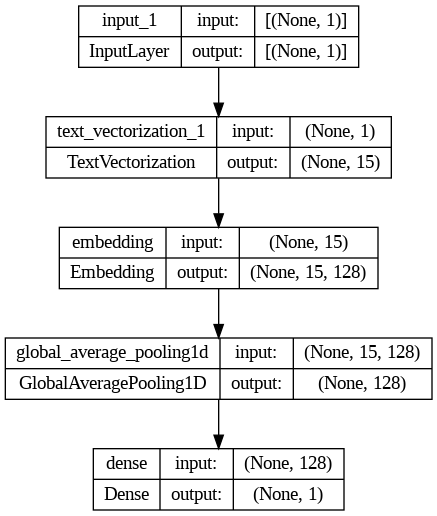

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes = True)


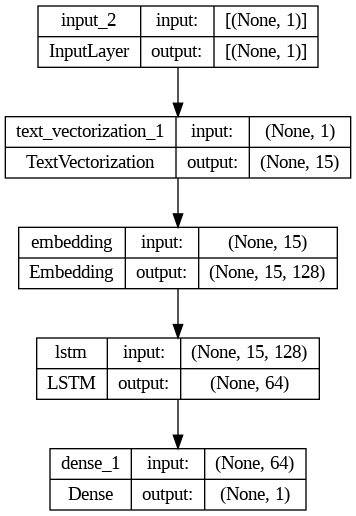

In [ ]:
plot_model(model_2, show_shapes = True)

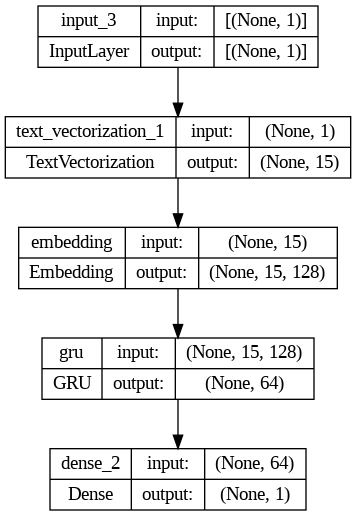

In [ ]:
plot_model(model_3, show_shapes = True)

## Model 4 Bidirect

In [ ]:
# Model 4
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_bi")

In [ ]:
model_4.summary()

Model: "model_4_bi"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-

In [ ]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model_4.fit(train_sentences,
            train_labels,
            epochs = 5,
            validation_data = (val_sentences, val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     'model_4_bi')])

Saving TensorBoard log files to: model_logs/model_4_bi/20230707-003148
Epoch 1/5
215/215 [==============================] - 16s 53ms/step - loss: 0.1042 - accuracy: 0.9724 - val_loss: 0.9483 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 10s 48ms/step - loss: 0.0509 - accuracy: 0.9774 - val_loss: 1.1067 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 10s 48ms/step - loss: 0.0489 - accuracy: 0.9780 - val_loss: 1.1952 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0404 - accuracy: 0.9803 - val_loss: 1.5044 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 10s 46ms/step - loss: 0.0425 - accuracy: 0.9801 - val_loss: 1.5318 - val_accuracy: 0.7717


In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4.predict(val_sentences)))

24/24 [==============================] - 1s 8ms/step


In [ ]:
model_4_results = calculate_results(val_labels,
                                    model_4_preds)
model_4_results

{'accuracy': 77.16535433070865,
 'precision': 0.7741380916586217,
 'recall': 0.7716535433070866,
 'f1': 0.7691811868378113}

## Model 5 Conv1D

In [ ]:
# Test embedding with conv1D

embedding_test = embedding(text_vectorizer(['this is a sentence']))
conv_1d = layers.Conv1D(filters = 32,
                        kernel_size = 5,
                        strides = 1,
                        activation = 'relu',
                        padding = 'same')
conv1d_output = conv_1d(embedding_test)
maxpool_1d = layers.GlobalMaxPool1D()
maxpool1d_output = maxpool_1d(conv1d_output)

embedding_test.shape, conv1d_output.shape, maxpool1d_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  activation = 'relu',
                  padding = 'valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_conv1d')

In [ ]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics =['accuracy'])

model_5.fit(train_sentences,
            train_labels,
            epochs = 5,
            validation_data = (val_sentences, val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     'model_5_conv1d')])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20230707-003315
Epoch 1/5
215/215 [==============================] - 7s 27ms/step - loss: 0.1237 - accuracy: 0.9604 - val_loss: 0.9213 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0738 - accuracy: 0.9715 - val_loss: 1.0334 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0610 - accuracy: 0.9756 - val_loss: 1.1491 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0529 - accuracy: 0.9781 - val_loss: 1.2673 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0502 - accuracy: 0.9785 - val_loss: 1.2686 - val_accuracy: 0.7651


In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5.predict(val_sentences)))

24/24 [==============================] - 0s 3ms/step


In [ ]:
model_5_results = calculate_results(val_labels,
                                    model_5_preds)
model_5_results

{'accuracy': 76.50918635170603,
 'precision': 0.7650786674444272,
 'recall': 0.7650918635170604,
 'f1': 0.7639596899608797}

## Model 6 TF HUB pretrained

In [ ]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed(['this is not a drill'])
embed_samples[0][:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.03094636, -0.02447678, -0.02650526,  0.03631886, -0.01744221,
        0.00520571,  0.06369885,  0.04325226,  0.04985498,  0.02585944],
      dtype=float32)>

In [ ]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = 'USE')

In [ ]:
# Create a model using sequential

model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     'model_6_use')])

Saving TensorBoard log files to: model_logs/model_6_use/20230707-003442
Epoch 1/5
215/215 [==============================] - 7s 16ms/step - loss: 0.5073 - accuracy: 0.7872 - val_loss: 0.4479 - val_accuracy: 0.8045
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4152 - accuracy: 0.8142 - val_loss: 0.4359 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4008 - accuracy: 0.8218 - val_loss: 0.4306 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3930 - accuracy: 0.8221 - val_loss: 0.4246 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3854 - accuracy: 0.8286 - val_loss: 0.4232 - val_accuracy: 0.8202


In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6.predict(val_sentences)))
model_6_preds[:10]

24/24 [==============================] - 1s 17ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(val_labels,
                                    model_6_preds)
model_6_results

{'accuracy': 82.02099737532808,
 'precision': 0.8210875591779185,
 'recall': 0.8202099737532809,
 'f1': 0.8192635530876636}

## Model 7 10% training data

In [ ]:
# THIS CAUSES DATA LEAKAGE

train_10_shuffled = train_df_shuffled[['text', 'target']].sample(frac = 0.1, random_state = 42)
train_10_sent = train_10_shuffled['text'].to_list()
train_10_labels = train_10_shuffled['target'].to_list()

In [ ]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
train_10_shuffled['target'].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
# Create a model using sequential

model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

model_7_history = model_7.fit(train_10_sent,
                              train_10_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     'model_7_use')])

Saving TensorBoard log files to: model_logs/model_7_use/20230707-003509
Epoch 1/5
24/24 [==============================] - 4s 48ms/step - loss: 0.6741 - accuracy: 0.6097 - val_loss: 0.6367 - val_accuracy: 0.7782
Epoch 2/5
24/24 [==============================] - 1s 39ms/step - loss: 0.6045 - accuracy: 0.7792 - val_loss: 0.5604 - val_accuracy: 0.7940
Epoch 3/5
24/24 [==============================] - 1s 48ms/step - loss: 0.5310 - accuracy: 0.7950 - val_loss: 0.4919 - val_accuracy: 0.8045
Epoch 4/5
24/24 [==============================] - 1s 28ms/step - loss: 0.4723 - accuracy: 0.8016 - val_loss: 0.4456 - val_accuracy: 0.8150
Epoch 5/5
24/24 [==============================] - 1s 22ms/step - loss: 0.4349 - accuracy: 0.8121 - val_loss: 0.4131 - val_accuracy: 0.8215


In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7.predict(val_sentences)))
model_7_preds[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(val_labels,
                                    model_7_preds)
model_7_results

{'accuracy': 82.1522309711286,
 'precision': 0.8213863317591764,
 'recall': 0.821522309711286,
 'f1': 0.8211742085328264}

In [ ]:
train_10_sent = train_sentences[:int(0.1 * len(train_sentences))]
train_10_labels = train_labels[:int(0.1 * len(train_sentences))]
len(train_10_sent), len(train_10_labels)

(685, 685)

In [ ]:
# Create a model using sequential

model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

model_7_history = model_7.fit(train_10_sent,
                              train_10_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     'model_7_use')])

Saving TensorBoard log files to: model_logs/model_7_use/20230707-003527
Epoch 1/5
22/22 [==============================] - 5s 51ms/step - loss: 0.6682 - accuracy: 0.7080 - val_loss: 0.6428 - val_accuracy: 0.7664
Epoch 2/5
22/22 [==============================] - 1s 23ms/step - loss: 0.5963 - accuracy: 0.8058 - val_loss: 0.5847 - val_accuracy: 0.7690
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5207 - accuracy: 0.8204 - val_loss: 0.5280 - val_accuracy: 0.7756
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4599 - accuracy: 0.8248 - val_loss: 0.4990 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4183 - accuracy: 0.8365 - val_loss: 0.4854 - val_accuracy: 0.7835


In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7.predict(val_sentences)))
model_7_preds[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(val_labels,
                                    model_7_preds)
model_7_results

{'accuracy': 78.34645669291339,
 'precision': 0.7847784624516524,
 'recall': 0.7834645669291339,
 'f1': 0.7817956468843655}

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.346457,0.788429,0.783465,0.780344
lstm,77.952756,0.784107,0.779528,0.776427
gru,77.690289,0.778427,0.776903,0.775004
bidirectional,77.165354,0.774138,0.771654,0.769181
conv1d,76.509186,0.765079,0.765092,0.763960
tf_hub_sentence_encoder,82.020997,0.821088,0.820210,0.819264
tf_hub_10_percent_data,78.346457,0.784778,0.783465,0.781796


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

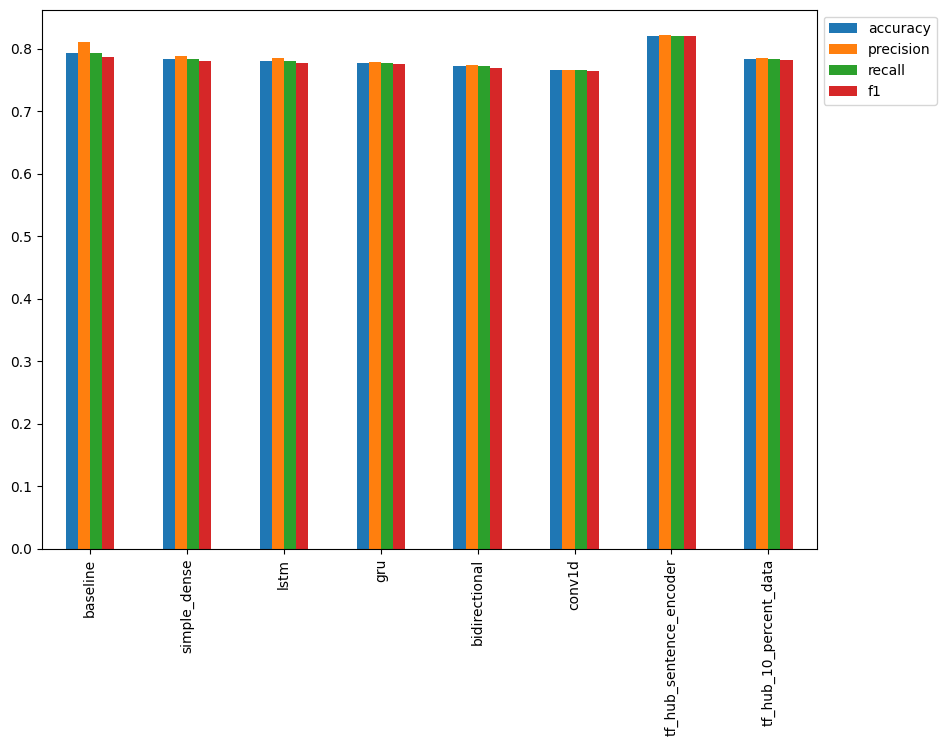

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

In [ ]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished

2023-07-07 00:35:38.289530: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   WGJ-MWY-NVW




New experiment created. View your TensorBoard at: https://tensorboard.dev/experi

## Save and load

In [ ]:
model_6.save('model_6.h5')

In [ ]:
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4232 - accuracy: 0.8202


[0.4232368469238281, 0.8202099800109863]

Now lets sae to the SaveModel foramt

In [ ]:
model_6.save('model_6.savemodel')

In [ ]:
loaded_model_save = tf.keras.models.load_model('model_6.savemodel',
                                               custom_objects = {'KerasLayer':hub.KerasLayer})

In [ ]:
loaded_model_save.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4232 - accuracy: 0.8202


[0.4232368469238281, 0.8202099800109863]

## Finding most wrong examples

In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)

24/24 [==============================] - 1s 20ms/step


In [ ]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.201546
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.825169
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.990253
3,@camilacabello97 Internally and externally scr...,1,0.0,0.230693
4,Radiation emergency #preparedness starts with ...,1,1.0,0.768945


In [ ]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
759,FedEx will no longer transport bioterror patho...,0,1.0,0.911903
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.911566
628,@noah_anyname That's where the concentration c...,0,1.0,0.878176
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.866481
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.850844
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.838053
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.825169
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.817171
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.813562
695,A look at state actions a year after Ferguson'...,0,1.0,0.805945


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9119027256965637
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.9115661978721619
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8781760931015015
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8664809465408325
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8508437871932983
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1, Prob: 0.8380525708198547
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... 

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.07199545204639435
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0, Prob: 0.06856151670217514
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.06518080085515976
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.06219267472624779
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.05447179824113846
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.047988466918468475
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 

## Making preds on test datast

In [ ]:
test_sentences = test_df['text'].to_list()

In [ ]:
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6)

In [ ]:
model_6.predict(['5 men died in the fire'])

1/1 [==============================] - 0s 55ms/step


array([[0.7730329]], dtype=float32)

In [ ]:
model_6.predict(['The new update for windows is scheduled on 5th Dec'])

1/1 [==============================] - 0s 77ms/step


array([[0.1580439]], dtype=float32)

In [ ]:
model_6.predict(['George got stabbed by a Nazi in Newway street'])

1/1 [==============================] - 0s 70ms/step


array([[0.8264984]], dtype=float32)

In [ ]:
model_6.predict(['Osama Bin laden died in an accident'])

1/1 [==============================] - 0s 68ms/step


array([[0.88177574]], dtype=float32)